#### Capstone

Jennifer J. Gurley<br>
Grand Canyon University<br>
DSC-580: Designing and Creating Data Products<br>
Amr Elchouemi<br>
21 August 2024<br>

In [84]:
# import libraries

#import streamlit as st
import pandas as pd
import numpy as np
#import seaborn as sns
#import math
#from collections import Counter
import statistics
from matplotlib import pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [85]:
#st.title('RN Retention Model')
#st.write('This model will predict RN longevity based on various employment factors')

In [86]:
# load dataset
data = pd.read_csv('C:/capstone/rndatafinal.csv')
data[0:5]

,compid,orgtype,emplid,tenure,active,gradrn,degree,volcerts,rnyears,lasthire,avghours,avgoncall,lateorcallin,avgshiftwork,retentionrisk,hiresource,performance
0,CAH,HOSP,1,3,1,1,2,0,39,2021,36,0,0,0,B,newspaper,B
1,CAH,ADM,2,39,1,0,2,0,43,1985,36,0,0,0,B,newspaper,B
2,CAH,CLIN,3,3,1,0,3,0,35,2021,24,0,0,0,B,referral,B
3,CAH,HOSP,4,10,1,0,1,0,10,2014,36,0,0,36,B,companywebsite,B
4,CAH,HOSP,5,18,1,0,1,1,32,2006,36,0,0,0,B,referral,B


In [87]:
# stats
df = pd.DataFrame(data)
print(df.describe())

           emplid      tenure     active      gradrn      degree    volcerts  \
count  200.000000  200.000000  200.00000  200.000000  200.000000  200.000000   
mean   100.500000   10.330000    0.79000    0.110000    1.815000    0.095000   
std     57.879185   11.044956    0.40833    0.313675    0.702311    0.420546   
min      1.000000    0.000000    0.00000    0.000000    1.000000    0.000000   
25%     50.750000    2.000000    1.00000    0.000000    1.000000    0.000000   
50%    100.500000    6.000000    1.00000    0.000000    2.000000    0.000000   
75%    150.250000   17.000000    1.00000    0.000000    2.000000    0.000000   
max    200.000000   44.000000    1.00000    1.000000    3.000000    3.000000   

          rnyears     lasthire    avghours  avgoncall  lateorcallin  \
count  200.000000   200.000000  200.000000  200.00000     200.00000   
mean    21.815000  2012.755000   32.815000    0.16000       0.31500   
std     13.401821    10.840784    7.632302    0.60517       0.7058

In [88]:
# stats
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   compid         200 non-null    object
 1   orgtype        200 non-null    object
 2   emplid         200 non-null    int64 
 3   tenure         200 non-null    int64 
 4   active         200 non-null    int64 
 5   gradrn         200 non-null    int64 
 6   degree         200 non-null    int64 
 7   volcerts       200 non-null    int64 
 8   rnyears        200 non-null    int64 
 9   lasthire       200 non-null    int64 
 10  avghours       200 non-null    int64 
 11  avgoncall      200 non-null    int64 
 12  lateorcallin   200 non-null    int64 
 13  avgshiftwork   200 non-null    int64 
 14  retentionrisk  200 non-null    object
 15  hiresource     200 non-null    object
 16  performance    200 non-null    object
dtypes: int64(12), object(5)
memory usage: 26.7+ KB


In [89]:
# stats
data.isnull().sum()

compid           0
orgtype          0
emplid           0
tenure           0
active           0
gradrn           0
degree           0
volcerts         0
rnyears          0
lasthire         0
avghours         0
avgoncall        0
lateorcallin     0
avgshiftwork     0
retentionrisk    0
hiresource       0
performance      0
dtype: int64

In [90]:
# find median tenure / this will be used to determine target tenure for test
statistics.median(data.tenure)

6.0

In [91]:
# add field to show if above or below median tenure
data['tenurecategory'] = ['high tenure' if x > 10 else 'medium tenure' if x > 6 else 'low tenure' for x in data.tenure]
data[0:5]

,compid,orgtype,emplid,tenure,active,gradrn,degree,volcerts,rnyears,lasthire,avghours,avgoncall,lateorcallin,avgshiftwork,retentionrisk,hiresource,performance,tenurecategory
0,CAH,HOSP,1,3,1,1,2,0,39,2021,36,0,0,0,B,newspaper,B,low tenure
1,CAH,ADM,2,39,1,0,2,0,43,1985,36,0,0,0,B,newspaper,B,high tenure
2,CAH,CLIN,3,3,1,0,3,0,35,2021,24,0,0,0,B,referral,B,low tenure
3,CAH,HOSP,4,10,1,0,1,0,10,2014,36,0,0,36,B,companywebsite,B,medium tenure
4,CAH,HOSP,5,18,1,0,1,1,32,2006,36,0,0,0,B,referral,B,high tenure


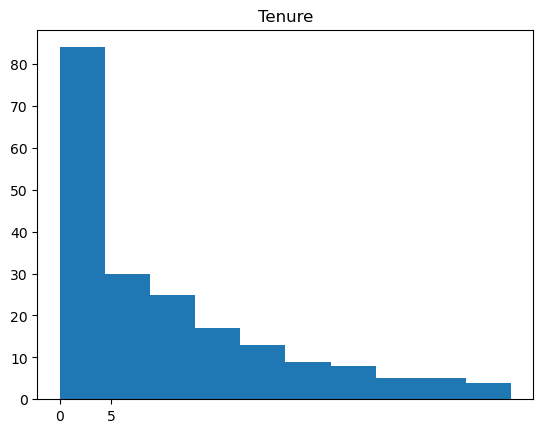

In [92]:
# eda plots
plt.hist(data.tenure)
plt.xticks((0,5))
plt.title('Tenure')
plt.show()

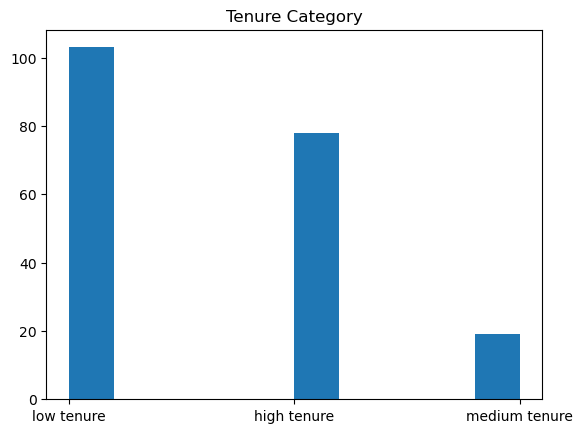

In [93]:
plt.hist(data.tenurecategory)
plt.title('Tenure Category')
plt.show()

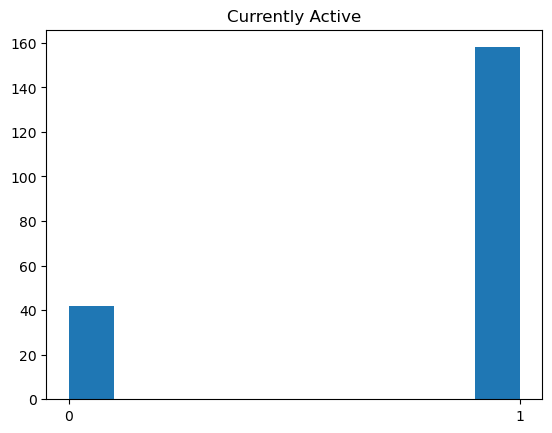

In [94]:
plt.hist(data.active)
plt.xticks((0,1))
plt.title('Currently Active')
plt.show()

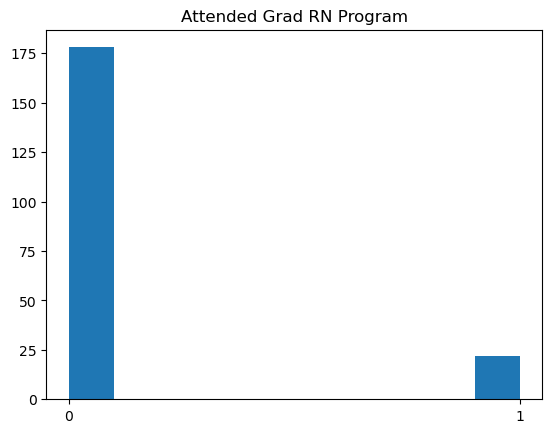

In [95]:
plt.hist(data.gradrn)
plt.xticks((0,1))
plt.title('Attended Grad RN Program')
plt.show()

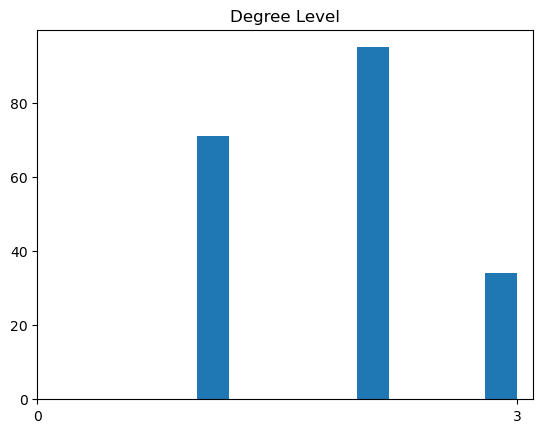

In [96]:
plt.hist(data.degree)
plt.xticks((0,3))
plt.title('Degree Level')
plt.show()

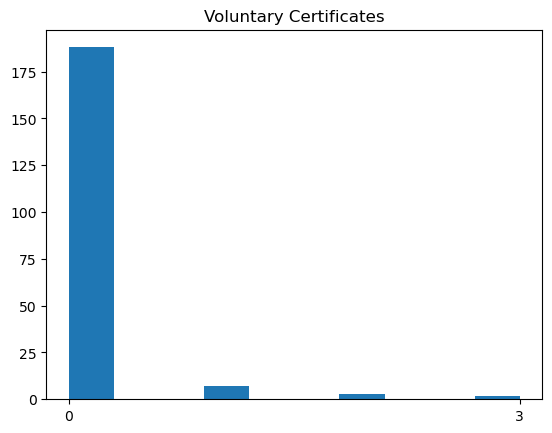

In [97]:
plt.hist(data.volcerts)
plt.xticks((0,3))
plt.title('Voluntary Certificates')
plt.show()

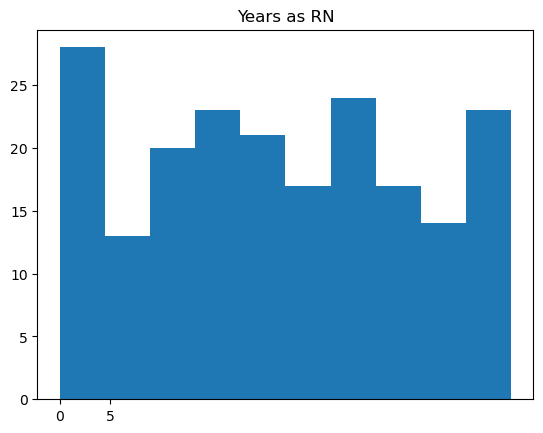

In [98]:
plt.hist(data.rnyears)
plt.xticks((0,5))
plt.title('Years as RN')
plt.show()

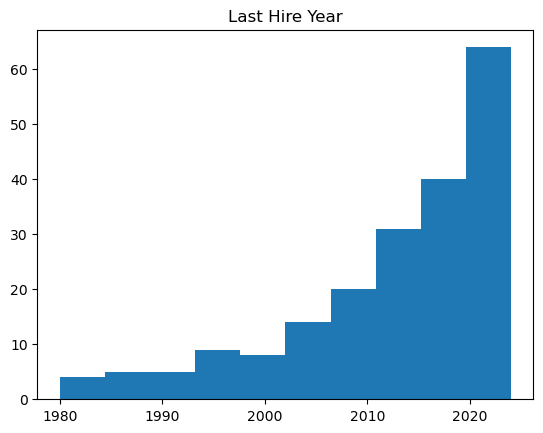

In [99]:
plt.hist(data.lasthire)
plt.title('Last Hire Year')
plt.show()

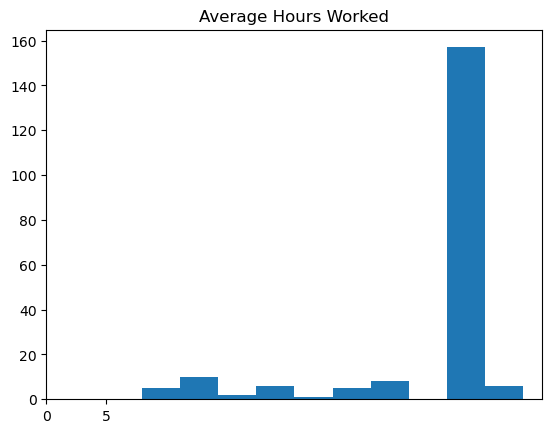

In [100]:
plt.hist(data.avghours)
plt.xticks((0,5))
plt.title('Average Hours Worked')
plt.show()

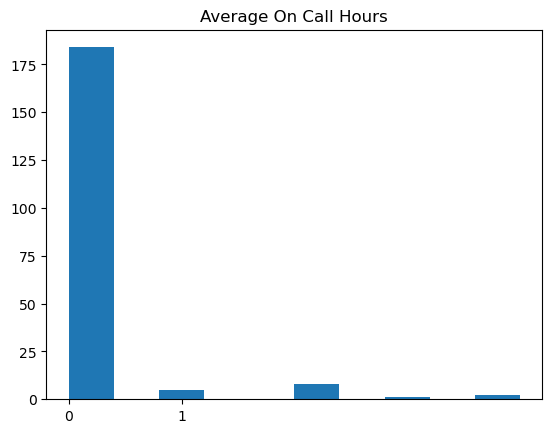

In [101]:
plt.hist(data.avgoncall)
plt.xticks((0,1))
plt.title('Average On Call Hours')
plt.show()

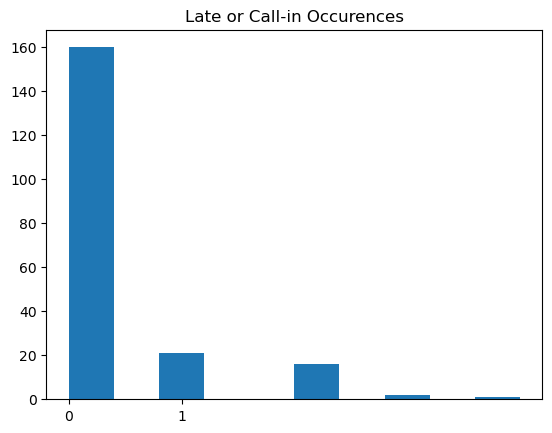

In [102]:
plt.hist(data.lateorcallin)
plt.xticks((0,1))
plt.title('Late or Call-in Occurences')
plt.show()

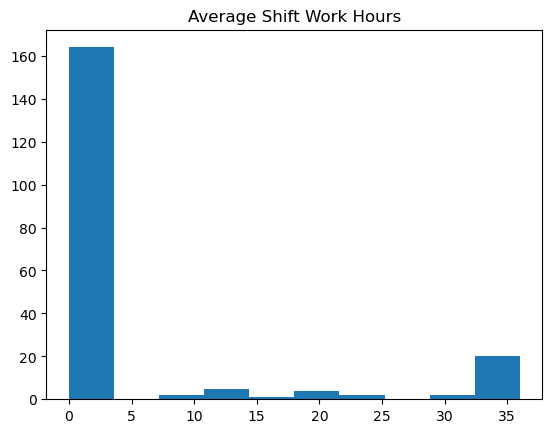

In [103]:
plt.hist(data.avgshiftwork)
plt.title('Average Shift Work Hours')
plt.show()

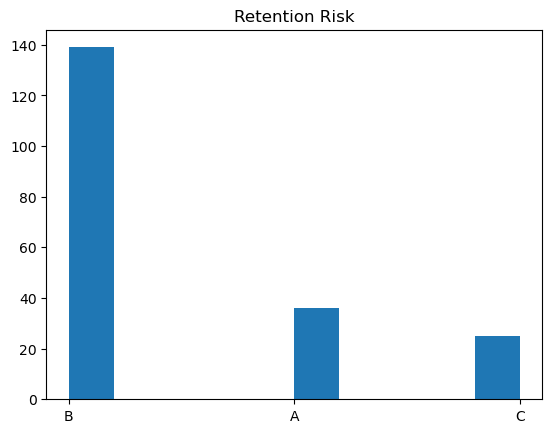

In [104]:
plt.hist(data.retentionrisk)
plt.title('Retention Risk')
plt.show()

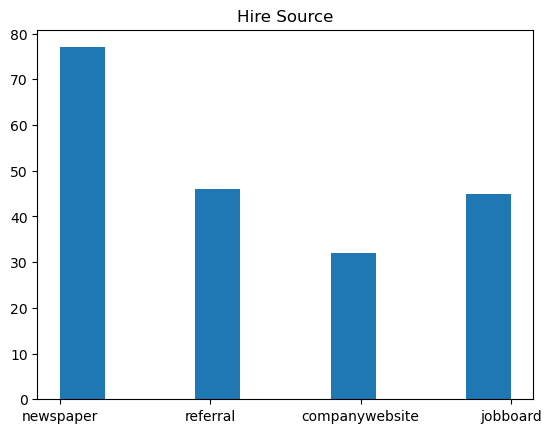

In [105]:
plt.hist(data.hiresource)
plt.title('Hire Source')
plt.show()

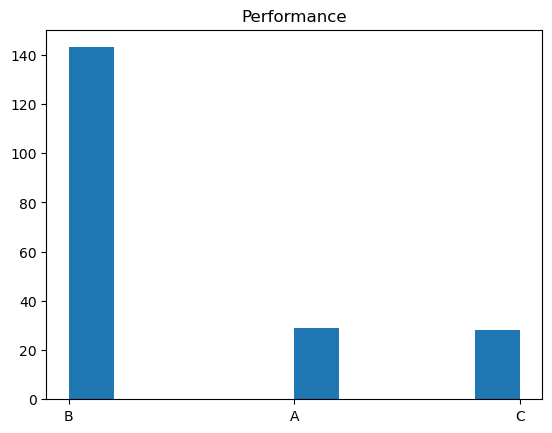

In [106]:
plt.hist(data.performance)
plt.title('Performance')
plt.show()

In [107]:
# split into training and testing
X = pd.DataFrame(data[['gradrn', 'degree', 'volcerts', 'rnyears', 'lasthire', 'avghours', 'avgoncall', 'lateorcallin', 'avgshiftwork', 'retentionrisk', 'hiresource', 'performance']])
y = pd.DataFrame(data[['tenurecategory']])
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20)

# one-hot encoding
X_train_hot = pd.get_dummies(X_train)
X_test_hot = pd.get_dummies(X_test)

X_train_hot

,gradrn,degree,volcerts,rnyears,lasthire,avghours,avgoncall,lateorcallin,avgshiftwork,retentionrisk_A,retentionrisk_B,retentionrisk_C,hiresource_companywebsite,hiresource_jobboard,hiresource_newspaper,hiresource_referral,performance_A,performance_B,performance_C
98,0,2,0,28,1998,36,0,0,0,0,1,0,0,0,1,0,0,1,0
188,0,1,0,31,1997,36,0,0,0,0,1,0,0,0,0,1,0,1,0
23,0,2,0,17,2007,36,0,0,0,0,1,0,1,0,0,0,0,1,0
121,0,2,0,36,2017,36,0,1,0,0,1,0,0,0,0,1,0,1,0
130,0,1,0,25,2017,8,0,0,8,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1,2,0,19,2022,36,0,0,0,0,1,0,0,0,0,1,0,1,0
21,0,1,0,42,1982,36,0,0,0,0,1,0,0,0,1,0,0,1,0
169,0,3,0,30,2024,36,0,0,36,0,0,1,0,0,1,0,0,1,0
123,1,3,0,9,2022,36,4,0,0,0,1,0,0,1,0,0,0,1,0


In [108]:
y_train

,tenurecategory
98,high tenure
188,high tenure
23,high tenure
121,medium tenure
130,medium tenure
...,...
147,low tenure
21,high tenure
169,low tenure
123,low tenure


In [109]:
print(y_train.shape)

(160, 1)


In [110]:
X_test_hot

,gradrn,degree,volcerts,rnyears,lasthire,avghours,avgoncall,lateorcallin,avgshiftwork,retentionrisk_A,retentionrisk_B,retentionrisk_C,hiresource_companywebsite,hiresource_jobboard,hiresource_newspaper,hiresource_referral,performance_A,performance_B,performance_C
109,1,2,0,26,2024,36,0,0,0,0,0,1,0,1,0,0,0,1,0
101,0,2,0,44,1986,18,0,0,0,0,1,0,0,0,0,1,0,1,0
112,0,1,0,28,1998,24,0,1,0,0,1,0,0,0,1,0,0,0,1
49,0,1,0,43,1994,36,2,3,0,0,1,0,0,0,0,1,0,0,1
86,0,1,0,25,2016,12,0,0,0,0,0,1,0,0,1,0,0,1,0
133,0,1,0,42,2000,36,0,0,0,1,0,0,0,0,1,0,0,1,0
50,1,3,0,2,2022,24,0,1,24,0,1,0,0,0,0,1,0,1,0
53,0,2,0,32,2017,36,0,0,0,0,1,0,0,0,1,0,0,1,0
145,0,1,0,37,2000,36,0,0,0,0,1,0,0,0,1,0,0,1,0
168,0,2,0,5,2019,36,0,0,0,0,1,0,0,1,0,0,0,1,0


In [111]:
y_test

,tenurecategory
109,low tenure
101,high tenure
112,high tenure
49,high tenure
86,low tenure
133,high tenure
50,low tenure
53,medium tenure
145,high tenure
168,low tenure


In [112]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski')

In [113]:
knn.fit(X_train_hot,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=10)

In [114]:
pred = knn.predict(X_test_hot)

In [115]:
error_rate = []

for i in range(1,160):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train_hot,y_train.values.ravel())
     pred_i = knn.predict(X_test_hot)
     error_rate.append(np.mean(pred_i != y_test.values.ravel()))

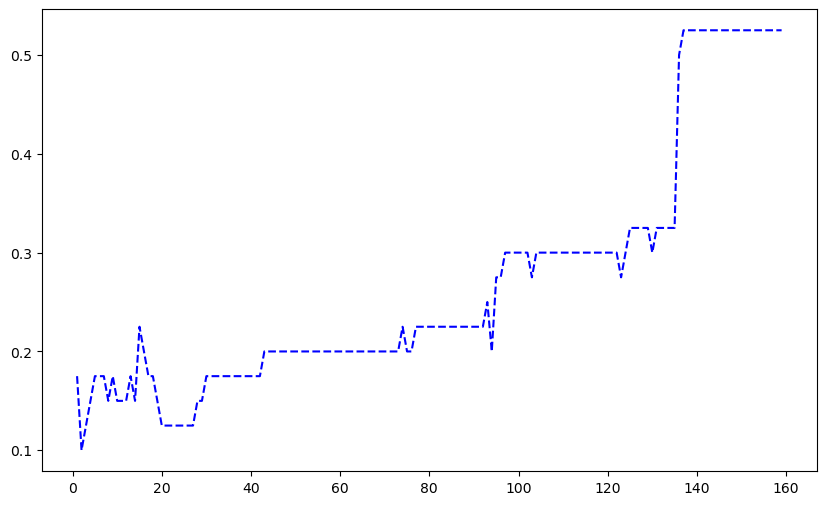

In [116]:
plt.figure(figsize=(10,6))
plt.plot(range(1,160),error_rate, color='blue',linestyle='dashed')

In [117]:
error_rate

[0.175,
 0.1,
 0.125,
 0.15,
 0.175,
 0.175,
 0.175,
 0.15,
 0.175,
 0.15,
 0.15,
 0.15,
 0.175,
 0.15,
 0.225,
 0.2,
 0.175,
 0.175,
 0.15,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.15,
 0.15,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.225,
 0.2,
 0.2,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.225,
 0.25,
 0.2,
 0.275,
 0.275,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.275,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.275,
 0.3,
 0.325,
 0.325,
 0.325,
 0.325,
 0.325,
 0.3,
 0.325,
 0.325,
 0.325,
 0.325,
 0.325,
 0.5,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525,
 0

In [118]:
print(confusion_matrix(y_test,pred))

[[15  0  3]
 [ 1 18  0]
 [ 0  2  1]]


In [119]:
print(classification_report(y_test,pred))

               precision    recall  f1-score   support

  high tenure       0.94      0.83      0.88        18
   low tenure       0.90      0.95      0.92        19
medium tenure       0.25      0.33      0.29         3

     accuracy                           0.85        40
    macro avg       0.70      0.70      0.70        40
 weighted avg       0.87      0.85      0.86        40



<b>References</b><br><br>
Brownlee, J. (2020 February 24). Develop K-Nearest Neighbors in Python From Scratch. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ <br><br>
Chaitanyasirivuri. (2023 September 18). Building Your First Streamlit App: A Step-by-Step Tutorial.https://medium.com/@chaitanyasirivuri/building-your-first-streamlit-app-a-step-by-step-tutorial-e058d5dfe5f4 
<br><br>
Harrison, O. (2018 September 10). Machine Learning Basics with the K-Nearest Neighbors Algorithm. https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761 <br><br>
TommyTech. (2021 January 12). The KNN Model With Python and Scikit-Learn [Video]. https://youtu.be/9armyESn5L0?si=w-mngX4zDHdoE9wP<br><br>
